# Notebook to calculate Statistics

### Import the libraries

In [58]:
import json
import sys
import pandas as pd
import collections 
import os
import numpy as np
from itertools import chain
from itertools import combinations
sys.path.insert(0, '..')
from src.experiment_utils.helper_classes import token, span, repository
from src.d02_corpus_statistics.corpus import Corpus
from definitions import ROOT_DIR
from pyannote.core import Segment

## Small Tutorial



### Classes and Dataframe

All the information is now stored in a dataframe called "stat_df" containing the string of the directory path, the raw text, and all the annotations (in form of list of spans) starting with the Curation:

In [59]:
    
dataframe_dir = os.path.join(ROOT_DIR,'data/02_processed_to_dataframe', 'preprocessed_dataframe.pkl')
stat_df = pd.read_pickle(dataframe_dir)
stat_df.head()

,Policy,Text,Tokens,Article_State,Finished_Annotators,Curation,Alisha,Fride,Onerva,Fabian,Lynn,Sebastian,Joel
EU_32018R1999_Title_0_Chapter_7_Section_3_Article_43,,article 43\r\nexercise of the delegation\r\n1....,"[start:0 stop:7 text:article tag_count:0, star...",CURATION_FINISHED,"[Alisha, Fride]",[annotator:Curation layer:Instrumenttypes type...,[annotator:Alisha layer:Instrumenttypes type:I...,[annotator:Fride layer:Policydesigncharacteris...,,,,,
EU_32019R0631_Title_0_Chapter_0_Section_0_Article_12,,article 12\r\nreal-world co2 emissions and fue...,"[start:0 stop:7 text:article tag_count:0, star...",CURATION_FINISHED,"[Onerva, Fabian]",[annotator:Curation layer:Instrumenttypes type...,,,[annotator:Onerva layer:Instrumenttypes type:I...,[annotator:Fabian layer:Policydesigncharacteri...,,,
EU_32018L2001_Title_0_Chapter_0_Section_0_Article_11,,article 11\r\njoint projects between member st...,"[start:0 stop:7 text:article tag_count:0, star...",CURATION_FINISHED,"[Fride, Onerva]",[annotator:Curation layer:Instrumenttypes type...,,[annotator:Fride layer:Instrumenttypes type:In...,[annotator:Onerva layer:Instrumenttypes type:I...,,,,
EU_32018R1999_Title_0_Chapter_7_Section_3_Article_56,,article 56\r\namendments to directive (eu) 201...,"[start:0 stop:7 text:article tag_count:0, star...",CURATION_FINISHED,"[Alisha, Fride]",[annotator:Curation layer:Policydesigncharacte...,[annotator:Alisha layer:Policydesigncharacteri...,[annotator:Fride layer:Policydesigncharacteris...,,,,,
EU_32018L2001_Title_0_Chapter_0_Section_0_Article_03,,article 3\r\nbinding overall union target for ...,"[start:0 stop:7 text:article tag_count:0, star...",CURATION_FINISHED,"[Fride, Onerva, Fabian]",[annotator:Curation layer:Instrumenttypes type...,,[annotator:Fride layer:Instrumenttypes type:In...,[annotator:Onerva layer:Instrumenttypes type:I...,[annotator:Fabian layer:Instrumenttypes type:I...,,,


In [60]:
stat_df.shape

(448, 13)

The spans of each paragraph are stored in list:

In [61]:
stat_df['Curation'][2]

[annotator:Curation layer:Instrumenttypes type:InstrumentType tag:Unspecified start:1662 stop:1676 text:support scheme,
 annotator:Curation layer:Instrumenttypes type:InstrumentType tag:Subsidies_Incentives start:1707 stop:1721 text:investment aid,
 annotator:Curation layer:Instrumenttypes type:InstrumentType tag:Unspecified start:5044 stop:5059 text:joint agreement,
 annotator:Curation layer:Instrumenttypes type:InstrumentType tag:Unspecified start:5371 stop:5379 text:measures,
 annotator:Curation layer:Policydesigncharacteristics type:Actor tag:Addressee_default start:35 stop:48 text:member states,
 annotator:Curation layer:Policydesigncharacteristics type:Actor tag:Addressee_default start:87 stop:100 text:member states,
 annotator:Curation layer:Policydesigncharacteristics type:Actor tag:Addressee_sector start:277 stop:294 text:private operators,
 annotator:Curation layer:Policydesigncharacteristics type:Reference tag:Ref_OtherPolicy start:335 stop:352 text:international law,
 annot

Each span has a layer, type, tag, start, stop, and the annotatet text (raw)

In [62]:
stat_df['Curation'][2][2]

annotator:Curation layer:Instrumenttypes type:InstrumentType tag:Unspecified start:5044 stop:5059 text:joint agreement

Each tag further has a repository, list of all the tokens and an annotator



In [63]:
stat_df['Curation'][2][2].rep

policy:EU_32018L2001 title:Title_0 chapter:Chapter_0 section:Section_0 article:Article_11

In [64]:
stat_df['Curation'][2][2].tokens

[start:5044 stop:5049 text:joint tag_count:1,
 start:5050 stop:5059 text:agreement tag_count:1]

In [65]:
stat_df['Curation'][2][2].annotator

'Curation'

It is important to note that the token objects reside in the separate column tokens, the list of tokens for each tag is just a pointer to those objects residing in the token column.

Each Token has a start, stop, text and a tag_count. The tag_count counts how many times this specific tokens has been labeled.

In [66]:
stat_df['Tokens'][2][49]

start:269 stop:276 text:involve tag_count:0

Repository's can be created trought the normal constructor **init**(self, policy, title, chapter, section, article) , or trough the classmethod **from_repository_name**(cls, rep_str), taking only a big string of the repository name. 

### Conditional Repository

The repository class can be used to create conditional repositorys, which are usefull to search in all the paragraphs matching a certain condition. Let's go on and create a test repository:

In [67]:
test_dir = repository.from_repository_name("EU_32008R1099_Title_0_Chapter_0_Section_0_Article_03")
test_dir

policy:EU_32008R1099 title:Title_0 chapter:Chapter_0 section:Section_0 article:Article_03

Let's now create a conditional repository. On each hirarchy, I can either match a certain name or I can match all the names by inserting 'None'. Simply speaking, we match all repositorys with the attributes given other than 'None. Let's assume I want to match all the tags in 'EU_32008R1099' I would create a repository like this:

In [68]:
test_dir = repository(policy = 'EU_32008R1099', title = None, chapter = None, section = None, article = None)
test_dir

policy:EU_32008R1099 title:None chapter:None section:None article:None

or simply

In [69]:
test_dir = repository(policy = 'EU_32008R1099')
test_dir

policy:EU_32008R1099 title:None chapter:None section:None article:None

If I want to match all the tags that are stored in the first article in all the policy's, titles, chapters and sections

In [70]:
test_dir = repository( article = 'Article_01')
test_dir

policy:None title:None chapter:None section:None article:Article_01

## Class Evaluator and evaluation functions

All the functions calculating statistics are contained the class "Corpus", it's only class member is the dataframe. The only constructor argument is a dataframe created by the load data script (NLP_spark/src/d01_data/load_data.py). To start the evaluation process, a new object of the class "Corpus" must be created

In [71]:
test_corpus = Corpus(stat_df)

In [72]:
test_corpus.df.shape

(412, 13)

By default, "Whereas" and "Front" articles are excluded. In case they should be included, initizialize the the test_corpus by setting front_and_whereas = True:

In [73]:
test_corpus_front_and_whereas = Corpus(stat_df, front_and_whereas = True)

In [74]:
test_corpus_front_and_whereas.df.shape

(448, 13)

### Drop Articles

The Corpus class allows to drop certain articles based on matching, e.g all the articles that **contain** the given string are droped. The string can be either passed as a single string or a list of strings.

In [75]:
matching_strings = ['front', 'Whereas']
test_corpus_front_and_whereas.drop_articles_based_on_string(matching_strings)


In [76]:
test_corpus_front_and_whereas.df.shape

(412, 13)

## Statistics

The most important function is the member function get_span_list(self, conditional_rep, columns, item, value). This functions takes a conditional repository (explained before), a item which can be either 'class, 'type' or 'tag' and a value. E.g item = 'layer' and value = 'Policydesigncharacteristics' or item = 'type and value ='Compliance' and item = 'tag' and value = 'Form_monitoring'. 

The function returns a list of all the tags in all the paragraphs matching the conditional repository and matching the item and value given. E.g I want to match all the tags of type 'Policydesigncharacteristics' in the policy 'EU_32008R1099':

In [77]:
test_dir = repository('EU_32008R1099')
test_corpus.get_span_list(conditional_rep = test_dir, columns = 'annotators')


[annotator:Alisha layer:Policydesigncharacteristics type:Time tag:Time_InEffect start:76 stop:110 text:20th day following its publication,
 annotator:Alisha layer:Policydesigncharacteristics type:Actor tag:Addressee_default start:239 stop:252 text:member states,
 annotator:Fride layer:Policydesigncharacteristics type:Time tag:Time_InEffect start:76 stop:134 text:20th day following its publication in the official journal,
 annotator:Fride layer:Policydesigncharacteristics type:Actor tag:Addressee_default start:239 stop:252 text:member states,
 annotator:Onerva layer:Policydesigncharacteristics type:Time tag:Time_InEffect start:52 stop:156 text:enter into force on the 20th day following its publication in the official journal of the european union,
 annotator:Onerva layer:Policydesigncharacteristics type:Actor tag:Addressee_default start:239 stop:252 text:member states,
 annotator:Alisha layer:Instrumenttypes type:InstrumentType tag:RegulatoryInstr start:574 stop:594 text:regulatory proc

If I don't want to specify the item and the value, so match all the tags that match the conditional repository, I can put 'None':

In [78]:
test_corpus.get_span_list(conditional_rep = test_dir, item = 'layer', value = 'Policydesigncharacteristics')

[annotator:Curation layer:Policydesigncharacteristics type:Time tag:Time_InEffect start:76 stop:134 text:20th day following its publication in the official journal,
 annotator:Curation layer:Policydesigncharacteristics type:Time tag:Time_InEffect start:76 stop:110 text:20th day following its publication,
 annotator:Curation layer:Policydesigncharacteristics type:Actor tag:Addressee_default start:239 stop:252 text:member states,
 annotator:Curation layer:Policydesigncharacteristics type:Time tag:Time_Monitoring start:11 stop:17 text:annual,
 annotator:Curation layer:Policydesigncharacteristics type:Compliance tag:Form_monitoring start:18 stop:36 text:nuclear statistics,
 annotator:Curation layer:Policydesigncharacteristics type:Actor tag:Authority_monitoring start:42 stop:52 text:commission,
 annotator:Curation layer:Policydesigncharacteristics type:Actor tag:Authority_monitoring start:54 stop:62 text:eurostat,
 annotator:Curation layer:Policydesigncharacteristics type:Actor tag:Address

All the other member functions are based on the Corpus.get_tag_list member function, they also take the same inputs. 

get_span_distro(self, conditional_rep, item, value, return_format) returns the distribution of spans of a tag_list either in dict{span:count} or list format. The lenght of the span can be calculated on character or token level:

In [79]:
test_corpus.get_span_distro(conditional_rep = test_dir, return_format = 'dict', level = 'character')

{10: 32,
 19: 17,
 20: 16,
 13: 14,
 8: 14,
 9: 14,
 17: 13,
 21: 12,
 11: 11,
 6: 10,
 18: 8,
 4: 8,
 15: 7,
 35: 6,
 27: 6,
 12: 6,
 7: 5,
 16: 4,
 25: 4,
 5: 4,
 31: 3,
 22: 3,
 23: 2,
 14: 2,
 24: 2,
 45: 2,
 36: 2,
 28: 2,
 58: 1,
 34: 1,
 81: 1,
 99: 1,
 72: 1,
 59: 1,
 86: 1,
 76: 1,
 30: 1,
 108: 1,
 29: 1,
 42: 1,
 33: 1}

In [80]:
test_corpus.get_span_distro(conditional_rep = test_dir, return_format = 'list')

[0,
 0,
 0,
 8,
 4,
 10,
 5,
 14,
 14,
 32,
 11,
 6,
 14,
 2,
 7,
 4,
 13,
 8,
 17,
 16,
 12,
 3,
 2,
 2,
 4,
 0,
 6,
 2,
 1,
 1,
 3,
 0,
 1,
 1,
 6,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

In [81]:
test_corpus.get_span_distro(conditional_rep = test_dir, return_format = 'dict', level = 'token')

{1: 98,
 2: 84,
 4: 18,
 3: 16,
 6: 6,
 5: 5,
 9: 4,
 7: 3,
 11: 2,
 8: 1,
 13: 1,
 14: 1,
 10: 1,
 12: 1,
 15: 1}

This span ditro can also be plottet:

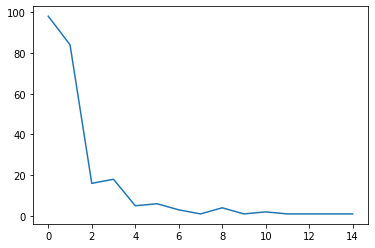

In [82]:
import matplotlib.pyplot as plt
plt.plot(test_corpus.get_span_distro(conditional_rep = test_dir, return_format = 'list', level = 'token'))
plt.show()

get_span_count(self, article, item, value) returns # of tags in the tag_list. Can be used to retrieve the amount of tags matching a certain condition. E.g all the tags of class 'Policydesigncharacteristics' in the policy 'EU_32008R1099':

In [83]:
test_corpus.get_span_count(item = 'layer', value = 'Policydesigncharacteristics', conditional_rep = test_dir)

199

get_tokens_from_span_list(self, conditional_rep, item, value) returns a list of all the tokens in a taglist

In [84]:
test_corpus.get_tokens_from_span_list(item = 'layer', value = 'Policydesigncharacteristics', conditional_rep = test_dir)

[start:55 stop:61 text:states tag_count:1,
 start:106 stop:115 text:community tag_count:1,
 start:116 stop:126 text:statistics tag_count:1,
 start:239 stop:245 text:member tag_count:1,
 start:133 stop:142 text:community tag_count:1,
 start:246 stop:252 text:states tag_count:1,
 start:143 stop:153 text:statistics tag_count:1,
 start:48 stop:54 text:member tag_count:2,
 start:55 stop:61 text:states tag_count:2,
 start:475 stop:485 text:regulation tag_count:1,
 start:486 stop:487 text:( tag_count:1,
 start:487 stop:489 text:ec tag_count:1,
 start:489 stop:490 text:) tag_count:1,
 start:491 stop:493 text:no tag_count:1,
 start:493 stop:494 text:  tag_count:1,
 start:84 stop:94 text:commission tag_count:1,
 start:494 stop:497 text:322 tag_count:1,
 start:497 stop:498 text:/ tag_count:1,
 start:96 stop:104 text:eurostat tag_count:1,
 start:498 stop:500 text:97 tag_count:1,
 start:110 stop:118 text:national tag_count:2,
 start:201 stop:211 text:regulation tag_count:1,
 start:119 stop:129 text

get_token_count_from_span_list returns the amount of tokens in the tag_list:

In [85]:
test_corpus.get_token_count_from_span_list(item = 'layer', value = 'Policydesigncharacteristics', conditional_rep = test_dir)

382

most_frequent_labeled_tokens(self, conditional_rep, item, value) returns a dict of all the most frequent tokens of a span_list

In [86]:
test_corpus.most_frequent_labeled_tokens(item = 'layer', value = 'Policydesigncharacteristics', conditional_rep = test_dir)

{'statistics': 56,
 'energy': 29,
 'commission': 23,
 'eurostat': 19,
 '/': 15,
 'the': 14,
 'national': 14,
 'and': 13,
 'member': 12,
 'of': 12,
 '(': 12,
 ')': 12,
 'states': 11,
 'community': 10,
 'ec': 9,
 'data': 8,
 'final': 7,
 'consumption': 7,
 'annual': 6,
 'nuclear': 6,
 'renewable': 6,
 'decision': 6,
 'following': 4,
 'reported': 4,
 'no': 4,
 '\xa0': 4,
 ',': 4,
 'statistical': 4,
 'regulation': 4,
 'monthly': 4,
 'studies': 3,
 'for': 3,
 'monitoring': 3,
 'gas': 3,
 'months': 3,
 'year': 3,
 '1999': 3,
 '468': 3,
 'producers': 3,
 'traders': 3,
 'distributors': 3,
 'transporters': 3,
 'importers': 3,
 'exporters': 3,
 '322': 3,
 '97': 3,
 '20th': 2,
 'day': 2,
 'its': 2,
 'publication': 2,
 'in': 2,
 'from': 2,
 '2009': 2,
 'period': 2,
 'quality': 2,
 'pilot': 2,
 'cost-benefit': 2,
 'analyses': 2,
 'reporting': 2,
 '2005': 2,
 '166': 2,
 'mechanism': 2,
 'kyoto': 2,
 'protocol': 2,
 'users': 2,
 'information': 2,
 'date': 2,
 'report': 2,
 'within': 2,
 'six': 2,
 't

get_label_count_per_token_distro(self, conditional_rep, return_format) returns a distribution of the tag_count for all the tokens in a conditional repository. This can be used to evaluate how many tokens have been labeled once, twice and so on. The distribution is returned in either list or dict.

In [87]:
test_corpus.get_label_count_per_token_distro(conditional_rep = test_dir, return_format = 'dict')

{0: 1586, 1: 329, 2: 111, 3: 13, 4: 2}

In [88]:
test_corpus.get_label_count_per_token_distro(conditional_rep = test_dir, return_format = 'list')

[1586, 329, 111, 13, 2]

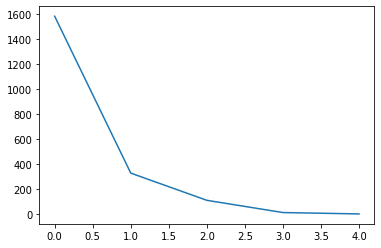

In [89]:
plt.plot(test_corpus.get_label_count_per_token_distro(conditional_rep = test_dir, return_format = 'list'))
plt.show()

## A few important examples

Calculating all the # of paragraphs

In [90]:
len(stat_df) #all raw articles

448

In [91]:
len(test_corpus.df) # all articles but whereas and front removed

412

total number of tags in a specific column

In [92]:
total_corpus_dir = repository()
test_corpus.get_span_count(total_corpus_dir, columns = 'Curation')

20578

since the curation is the default, this is the same as

In [93]:
test_corpus.get_span_count(total_corpus_dir)

20578

To check that this is true, we compare this to all the tags present in the dataframe:

In [94]:
len(list(chain.from_iterable(test_corpus.df['Curation'])))

20578

### Annotated tokens to total tokens

To test all the calculations, they are done twice with different methods:

In [95]:
#Total:
print(test_corpus.get_token_count_from_repository(total_corpus_dir))
print(len(list(chain.from_iterable(test_corpus.df['Tokens']))))

173438
173438


In [96]:
#annotated: (summing over all the tokens having a minimum one label)
print(sum(test_corpus.get_label_count_per_token_distro(total_corpus_dir, 'list')[1:]))
print(test_corpus.get_token_count_from_span_list(conditional_rep = total_corpus_dir))

52298
52298


### Token Label Count Distribution

In [97]:
test_corpus.get_label_count_per_token_distro(total_corpus_dir, 'list')

[121140, 44548, 6967, 707, 70, 6]

In [98]:
test_corpus.get_label_count_per_token_distro(total_corpus_dir, 'dict')

{0: 121140, 1: 44548, 2: 6967, 3: 707, 4: 70, 5: 6}

# Statistics

We are only interested in the curation and therfore subset the dataframe to exclude the annotation by the annotators.

## Basic statistics

Full corpus representing the curated dataset:


In [99]:
total_corpus_dir = repository()
total_corpus_dir

policy:None title:None chapter:None section:None article:None

### Total number of annotated articles

The number of annotated articles

In [100]:
# Assign the number of spans in each article to a new column
test_corpus.df['Curationlength'] = test_corpus.df.apply(lambda x: len(x['Curation']), axis=1)
# Count those where no annotations were made
sum(test_corpus.df['Curationlength']!=0)

412

The number of annotated articles including whereas and front:

In [101]:
# Assign the number of spans in each article to a new column
stat_df['Curationlength'] = stat_df.apply(lambda x: len(x['Curation']), axis=1)
# Count those where no annotations were made
sum(stat_df['Curationlength']!=0)

430

## Summary of annotations



## Span length



Distribution of the length of the spans in the curated set.



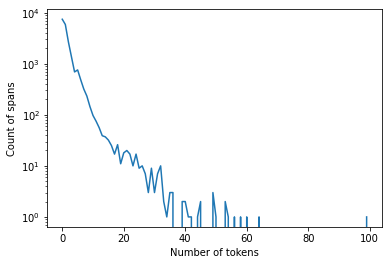

In [102]:
span_len_tokens = test_corpus.get_span_distro(conditional_rep = total_corpus_dir, return_format = 'list', level = 'token')

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(span_len_tokens)
ax.set_xlabel('Number of tokens')
ax.set_ylabel('Count of spans')
ax.set_yscale('log')
plt.savefig('span_distribution_tokens.png', dpi=200)
plt.show()

Fraction of spans with 3 or less tokens:



In [103]:
sum(span_len_tokens[:3])/sum(span_len_tokens) 


0.7775779959179706

### Looking at those long spans


In [104]:
spanlist_total_corpus = test_corpus.get_span_list(conditional_rep = total_corpus_dir)


In [105]:
# Making a dataframe that can be sorted by the number of characters in the info string
entrylen = [len(x.text) for x in spanlist_total_corpus]
spanlen = pd.DataFrame(data = {"entrylen": entrylen, "spanlist": spanlist_total_corpus})
spanlen = spanlen.sort_values(by = "entrylen", ascending=False)
print(str(spanlen.iloc[0,1]))

annotator:Curation layer:Policydesigncharacteristics type:Reversibility tag:Reversibility_policy start:1630 stop:2099 text:a delegated act adopted pursuant to article 3(5), article 15(5), article 26(6), article 37(7) and article 40(4) shall enter into force only if no objection has been expressed either by the european parliament or the council within a period of two months of notification of that act to the european parliament and to the council or if, before the expiry of that period, the european parliament and the council have both informed the commission that they will not object.



In [106]:
test_corpus.get_span_distro(conditional_rep = total_corpus_dir, return_format = 'dict', level = 'character')


{13: 1650,
 10: 1547,
 12: 1137,
 8: 1067,
 7: 870,
 6: 862,
 11: 860,
 9: 858,
 20: 788,
 19: 663,
 16: 611,
 17: 599,
 14: 569,
 15: 544,
 29: 542,
 18: 460,
 4: 444,
 24: 432,
 21: 419,
 28: 417,
 25: 357,
 22: 312,
 5: 290,
 26: 283,
 23: 283,
 27: 280,
 33: 192,
 30: 186,
 31: 162,
 34: 137,
 35: 134,
 32: 130,
 38: 120,
 36: 109,
 43: 109,
 44: 109,
 3: 95,
 37: 93,
 40: 84,
 39: 83,
 41: 80,
 45: 78,
 50: 76,
 42: 69,
 48: 60,
 47: 57,
 49: 54,
 46: 54,
 54: 51,
 53: 40,
 58: 39,
 52: 36,
 51: 36,
 55: 36,
 67: 35,
 59: 32,
 60: 30,
 56: 29,
 57: 26,
 63: 26,
 68: 24,
 62: 23,
 66: 22,
 64: 22,
 61: 19,
 70: 18,
 72: 17,
 65: 16,
 73: 16,
 71: 16,
 69: 15,
 80: 15,
 75: 14,
 83: 14,
 77: 14,
 74: 14,
 79: 13,
 82: 13,
 88: 12,
 87: 12,
 86: 12,
 78: 11,
 95: 10,
 76: 10,
 93: 10,
 89: 9,
 90: 9,
 85: 9,
 99: 9,
 96: 8,
 91: 8,
 81: 8,
 92: 8,
 102: 7,
 128: 6,
 98: 6,
 141: 6,
 121: 6,
 84: 6,
 118: 6,
 97: 6,
 129: 6,
 94: 6,
 112: 5,
 113: 5,
 114: 5,
 115: 5,
 124: 5,
 144: 5

In [123]:
## finding largest span
top_span_count = 1
entrylen.sort(reverse = True)
top_spans = [x for x in spanlist_total_corpus if len(x.text) >= entrylen[top_span_count - 1]]
top_spans

[annotator:Curation layer:Policydesigncharacteristics type:Reversibility tag:Reversibility_policy start:1630 stop:2099 text:a delegated act adopted pursuant to article 3(5), article 15(5), article 26(6), article 37(7) and article 40(4) shall enter into force only if no objection has been expressed either by the european parliament or the council within a period of two months of notification of that act to the european parliament and to the council or if, before the expiry of that period, the european parliament and the council have both informed the commission that they will not object.]

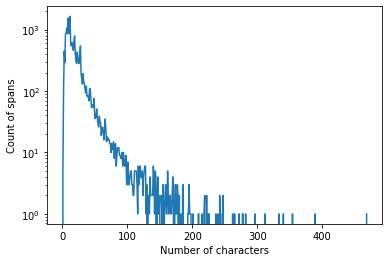

In [125]:
fig, ax = plt.subplots()
ax.plot(test_corpus.get_span_distro(conditional_rep = total_corpus_dir, return_format = 'list', level = 'character'))
ax.set_xlabel('Number of characters')
ax.set_ylabel('Count of spans')
ax.set_yscale('log')
plt.savefig('span_distribution_char.png', dpi=200)
plt.show()

## Most frequent spans for example tags


Most frequent tokens for low-carbon technology



In [126]:
tech_LowCarbon_tokens = test_corpus.most_frequent_labeled_tokens(item = 'tag', value = 'Tech_LowCarbon', conditional_rep = total_corpus_dir)
tech_LowCarbon_tokens_top = dict(list(tech_LowCarbon_tokens.items())[:13])
print(tech_LowCarbon_tokens_top)

{'energy': 251, 'and': 244, 'cogeneration': 138, 'efficiency': 129, 'from': 114, 'systems': 114, 'batteries': 110, 'accumulators': 110, 'heating': 110, 'renewable': 105, 'or': 103, 'cooling': 103, 'electricity': 91}


Most frequent tokens for other technology

In [127]:
tech_Other_tokens = test_corpus.most_frequent_labeled_tokens(item = 'tag', value = 'Tech_Other', conditional_rep = total_corpus_dir)
tech_Other_tokens_top = dict(list(tech_Other_tokens.items())[:13])
print(tech_Other_tokens_top)

{'system': 160, 'vehicles': 92, 'buildings': 77, 'systems': 72, 'passenger': 69, 'and': 69, 'commercial': 63, 'transmission': 63, 'distribution': 63, 'light': 62, 'electricity': 58, 'building': 56, 'cars': 55}


Most frequent spans for low-carbon technology

In [129]:
tech_LowCarbon_spans = test_corpus.most_frequent_labeled_spans(item = 'tag', value = 'Tech_LowCarbon', conditional_rep = total_corpus_dir)
tech_LowCarbon_spans_top = dict(list(tech_LowCarbon_spans.items())[:15])
print(tech_LowCarbon_spans_top)


{'energy efficiency': 87, 'cogeneration': 61, 'batteries': 56, 'accumulators': 56, 'installation': 36, 'recharging points': 36, 'high-efficiency cogeneration': 34, 'district heating and cooling': 23, 'energy storage facilities': 22, 'smart metering systems': 22, 'renovation': 22, 'battery': 16, 'installations': 16, 'hydrogen components and systems': 15, 'batteries and accumulators': 13}


Most frequent spans for other technology

In [130]:
tech_Other_spans = test_corpus.most_frequent_labeled_spans(item = 'tag', value = 'Tech_Other', conditional_rep = total_corpus_dir)
tech_Other_spans_top = dict(list(tech_Other_spans.items())[:15])
print(tech_Other_spans_top)

{'buildings': 49, 'passenger cars': 35, 'transmission system': 35, 'system': 31, 'grid': 29, 'building': 29, 'light commercial vehicles': 28, 'distribution system': 22, 'new passenger cars': 20, 'new light commercial vehicles': 19, 'network': 19, 'vehicles': 17, 'installations': 14, 'vehicle': 12, 'infrastructure': 11}


Most frequent spans for Form Monitoring

In [131]:
spans = test_corpus.most_frequent_labeled_spans(item = 'tag', value = 'Form_monitoring', conditional_rep = total_corpus_dir)
spans_top = dict(list(spans.items())[:15])
print(spans_top)

{'report': 146, 'reporting': 79, 'assessment': 68, 'review': 63, 'information': 58, 'notification': 57, 'monitoring': 46, 'reports': 46, 'projections': 39, 'notify': 33, 'reported': 32, 'monitor': 27, 'assess': 25, 'inventory': 24, 'notified': 21}


Most frequent spans for Instrument types

In [132]:
spans = test_corpus.most_frequent_labeled_spans(item = 'tag', value = 'RegulatoryInstr', conditional_rep = total_corpus_dir)
spans_top = dict(list(spans.items())[:15])
print(spans_top)

{'requirements': 92, 'obligations': 65, 'rules': 49, 'derogation': 48, 'obligation': 25, 'regulations': 24, 'standards': 24, 'certification': 23, 'criteria': 21, 'technical specifications': 19, 'sustainability criteria': 15, 'type-approval': 14, 'right': 14, 'regulatory procedure': 14, 'guarantees of origin': 13}


In [133]:
spans = test_corpus.most_frequent_labeled_spans(item = 'type', value = 'Actor', conditional_rep = total_corpus_dir)
spans_top = dict(list(spans.items())[:15])
print(spans_top)

{'member states': 901, 'commission': 757, 'member state': 277, 'member\xa0states': 260, 'european parliament': 167, 'council': 164, 'regulatory authority': 144, 'transmission system operator': 111, 'final customers': 102, 'member\xa0state': 92, 'customers': 86, 'transmission system operators': 85, 'distribution system operators': 81, 'manufacturer': 63, 'regulatory authorities': 54}


In [134]:
spans = test_corpus.most_frequent_labeled_spans(item = 'tag', value = 'Addressee_sector', conditional_rep = total_corpus_dir)
spans_top = dict(list(spans.items())[:15])
print(spans_top)

{'transmission system operator': 91, 'distribution system operators': 69, 'transmission system operators': 68, 'manufacturer': 52, 'suppliers': 41, 'distribution system operator': 37, 'manufacturers': 34, 'final customers': 31, 'supplier': 28, 'transport sector': 24, 'transport': 23, 'independent system operator': 23, 'market participants': 19, 'electricity undertakings': 16, 'producers': 15}


In [135]:
spans = test_corpus.most_frequent_labeled_spans(item = 'tag', value = 'Objective_QualIntention', conditional_rep = total_corpus_dir)
spans_top = dict(list(spans.items())[:20])
print(spans_top)

{'objectives': 33, 'targets': 16, 'energy savings': 12, 'contributions': 11, 'national overall targets': 8, 'national overall target': 7, 'energy efficiency': 6, 'national objectives': 6, 'union target': 6, 'target': 6, 'energy union objectives': 6, 'indicative trajectory': 6, 'national target': 4, 'reducing end-use energy consumption': 4, 'objectives of the energy union': 4, 'national targets': 4, 'national targets and objectives': 4, 'objectives, targets and contributions': 4, "union's 2030 target": 4, 'greenhouse gas emission reduction or limitation targets': 3}


In [136]:
spans = test_corpus.most_frequent_labeled_spans(item = 'type', value = 'Reversibility', conditional_rep = total_corpus_dir)
spans_top = dict(list(spans.items())[:20])
print(spans_top)

{'repealed': 4, 'extension': 3, 'a decision to revoke shall put an end to the delegation of the power specified in that decision': 2, 'repealing': 2, 'extended by two months': 2, 'may be revoked at any time by the european parliament or by the council': 2, 'deleted': 2, 'repeal': 2, 'delegation of power shall be tacitly extended for periods of an identical duration, unless the european parliament or the council opposes such extension not later than three months before the end of each period': 1, 'the delegation of power referred to in article 3(5), article 15(5), article 26(6), article 37(7) and article 40(4) may be revoked at any time by the european parliament or by the council': 1, 'a delegated act adopted pursuant to article 3(5), article 15(5), article 26(6), article 37(7) and article 40(4) shall enter into force only if no objection has been expressed either by the european parliament or the council within a period of two months of notification of that act to the european parliam

In [137]:
spans = test_corpus.most_frequent_labeled_spans(item = 'type', value = 'ApplicationSpecificity', conditional_rep = total_corpus_dir)
spans_top = dict(list(spans.items())[:15])
print(spans_top)

{'heating': 98, 'cooling': 94, 'energy savings': 61, 'supply': 49, 'energy consumption': 36, 'consumption': 31, 'aggregation': 30, 'demand response': 28, 'generation': 26, 'energy services': 25, 'transport': 23, 'distribution': 22, 'transmission': 21, 'renewable energy communities': 19, 'energy storage': 14}


In [138]:
spans = test_corpus.most_frequent_labeled_spans(item = 'tag', value = 'App_LowCarbon', conditional_rep = total_corpus_dir)
spans_top = dict(list(spans.items())[:15])
print(spans_top)

{'heating': 78, 'cooling': 78, 'energy savings': 54, 'demand response': 27, 'renewable energy communities': 19, 'energy storage': 14, 'energy efficiency': 13, 'electric vehicles': 12, 'electricity': 12, 'transport': 12, 'vehicles': 10, 'renewables self-consumption': 10, 'vehicle': 9, 'primary energy savings': 8, 'final consumption of energy from renewable sources': 7}


In [139]:
spans = test_corpus.most_frequent_labeled_spans(item = 'type', value = 'EnergySpecificity', conditional_rep = total_corpus_dir)
spans_top = dict(list(spans.items())[:15])
print(spans_top)

{'electricity': 199, 'renewable energy': 159, 'energy from renewable sources': 157, 'biofuels': 125, 'energy': 121, 'bioliquids': 92, 'hydrogen': 68, 'biomass fuels': 61, 'renewable energy sources': 40, 'biomass': 39, 'electricity from renewable sources': 31, 'fuel': 28, 'heat': 25, 'lng': 25, 'natural gas': 24}


In [140]:
spans = test_corpus.most_frequent_labeled_spans(item = 'tag', value = 'Energy_LowCarbon', conditional_rep = total_corpus_dir)
spans_top = dict(list(spans.items())[:15])
print(spans_top)

{'renewable energy': 159, 'energy from renewable sources': 157, 'biofuels': 125, 'bioliquids': 92, 'electricity': 82, 'hydrogen': 68, 'biomass fuels': 60, 'renewable energy sources': 40, 'biomass': 39, 'electricity from renewable sources': 31, 'biofuel': 23, 'biogas': 21, 'alternative fuels': 17, 'waste heat and cold': 17, 'renewable sources': 16}


## Counts of annotations

### Number of annotations per layer

In [148]:
stat_corpus = test_corpus

In [149]:
n_instr = stat_corpus.get_span_count(item = 'layer',value = 'Instrumenttypes', conditional_rep = total_corpus_dir)
n_pdc = stat_corpus.get_span_count(item = 'layer',value = 'Policydesigncharacteristics', conditional_rep = total_corpus_dir)
n_techspec = stat_corpus.get_span_count(item = 'layer',value = 'Technologyandapplicationspecificity', conditional_rep = total_corpus_dir)


In [150]:
n_instr1 = stat_corpus.get_span_count(item = 'tag',value = 'VoluntaryAgrmt', conditional_rep = total_corpus_dir)
n_instr2 = stat_corpus.get_span_count(item = 'tag',value = 'FrameworkPolicy', conditional_rep = total_corpus_dir)
n_instr3 = stat_corpus.get_span_count(item = 'tag',value = 'TradablePermit', conditional_rep = total_corpus_dir)
n_instr4 = stat_corpus.get_span_count(item = 'tag',value = 'RegulatoryInstr', conditional_rep = total_corpus_dir)
n_instr5 = stat_corpus.get_span_count(item = 'tag',value = 'TaxIncentives', conditional_rep = total_corpus_dir)
n_instr6 = stat_corpus.get_span_count(item = 'tag',value = 'Subsidies_Incentives', conditional_rep = total_corpus_dir)
n_instr7 = stat_corpus.get_span_count(item = 'tag',value = 'RD_D', conditional_rep = total_corpus_dir)
n_instr8 = stat_corpus.get_span_count(item = 'tag',value = 'PublicInvt', conditional_rep = total_corpus_dir)
n_instr9 = stat_corpus.get_span_count(item = 'tag',value = 'Edu_Outreach', conditional_rep = total_corpus_dir)
n_instr10 = stat_corpus.get_span_count(item = 'tag',value = 'Unspecified', conditional_rep = total_corpus_dir)

In [151]:
n_pdc1 = stat_corpus.get_span_count(item = 'type',value = 'Actor', conditional_rep = total_corpus_dir)
n_pdc2 = stat_corpus.get_span_count(item = 'type',value = 'Compliance', conditional_rep = total_corpus_dir)
n_pdc3 = stat_corpus.get_span_count(item = 'type',value = 'Reference', conditional_rep = total_corpus_dir)
n_pdc4 = stat_corpus.get_span_count(item = 'type',value = 'Objective', conditional_rep = total_corpus_dir)
n_pdc5 = stat_corpus.get_span_count(item = 'type',value = 'Resource', conditional_rep = total_corpus_dir)
n_pdc6 = stat_corpus.get_span_count(item = 'type',value = 'Reversibility', conditional_rep = total_corpus_dir)
n_pdc7 = stat_corpus.get_span_count(item = 'type',value = 'Time', conditional_rep = total_corpus_dir)

In [152]:
n_pdc11 = stat_corpus.get_span_count(item = 'tag',value = 'Authority_default', conditional_rep = total_corpus_dir)
n_pdc12 = stat_corpus.get_span_count(item = 'tag',value = 'Authority_legislative', conditional_rep = total_corpus_dir)
n_pdc13 = stat_corpus.get_span_count(item = 'tag',value = 'Authority_established', conditional_rep = total_corpus_dir)
n_pdc14 = stat_corpus.get_span_count(item = 'tag',value = 'Authority_monitoring', conditional_rep = total_corpus_dir)
n_pdc15 = stat_corpus.get_span_count(item = 'tag',value = 'Addressee_default', conditional_rep = total_corpus_dir)
n_pdc16 = stat_corpus.get_span_count(item = 'tag',value = 'Addressee_resource', conditional_rep = total_corpus_dir)
n_pdc17 = stat_corpus.get_span_count(item = 'tag',value = 'Addressee_monitored', conditional_rep = total_corpus_dir)
n_pdc18 = stat_corpus.get_span_count(item = 'tag',value = 'Addressee_sector', conditional_rep = total_corpus_dir)
##
n_pdc21 = stat_corpus.get_span_count(item = 'tag',value = 'Form_sanctioning', conditional_rep = total_corpus_dir)
n_pdc22 = stat_corpus.get_span_count(item = 'tag',value = 'Form_monitoring', conditional_rep = total_corpus_dir)
##
n_pdc31 = stat_corpus.get_span_count(item = 'tag',value = 'Ref_OtherPolicy', conditional_rep = total_corpus_dir)
n_pdc32 = stat_corpus.get_span_count(item = 'tag',value = 'Ref_PolicyAmended', conditional_rep = total_corpus_dir)
n_pdc33 = stat_corpus.get_span_count(item = 'tag',value = 'Ref_Strategy_Agreement', conditional_rep = total_corpus_dir)
##
n_pdc41 = stat_corpus.get_span_count(item = 'tag',value = 'Objective_QuantTarget', conditional_rep = total_corpus_dir)
n_pdc42 = stat_corpus.get_span_count(item = 'tag',value = 'Objective_QualIntention', conditional_rep = total_corpus_dir)
n_pdc43 = stat_corpus.get_span_count(item = 'tag',value = 'Objective_QuantTarget_noCCM', conditional_rep = total_corpus_dir)
n_pdc44 = stat_corpus.get_span_count(item = 'tag',value = 'Objective_QualIntention_noCCM', conditional_rep = total_corpus_dir)
##
n_pdc51 = stat_corpus.get_span_count(item = 'tag',value = 'Resource_MonSpending', conditional_rep = total_corpus_dir)
n_pdc52 = stat_corpus.get_span_count(item = 'tag',value = 'Resource_MonRevenues', conditional_rep = total_corpus_dir)
n_pdc53 = stat_corpus.get_span_count(item = 'tag',value = 'Resource_other', conditional_rep = total_corpus_dir)
##
n_pdc61 = stat_corpus.get_span_count(item = 'tag',value = '', conditional_rep = total_corpus_dir)
##
n_pdc71 = stat_corpus.get_span_count(item = 'tag',value = 'Time_PolDuration', conditional_rep = total_corpus_dir)
n_pdc72 = stat_corpus.get_span_count(item = 'tag',value = 'Time_Monitoring', conditional_rep = total_corpus_dir)
n_pdc73 = stat_corpus.get_span_count(item = 'tag',value = 'Time_Resources', conditional_rep = total_corpus_dir)
n_pdc74 = stat_corpus.get_span_count(item = 'tag',value = 'Time_Compliance', conditional_rep = total_corpus_dir)
n_pdc75 = stat_corpus.get_span_count(item = 'tag',value = 'Time_InEffect', conditional_rep = total_corpus_dir)

In [153]:
n_techspec1 = stat_corpus.get_span_count(item = 'type',value = 'TechnologySpecificity', conditional_rep = total_corpus_dir)
n_techspec2 = stat_corpus.get_span_count(item = 'type',value = 'EnergySpecificity', conditional_rep = total_corpus_dir)
n_techspec3 = stat_corpus.get_span_count(item = 'type',value = 'ApplicationSpecificity', conditional_rep = total_corpus_dir)

In [154]:
n_techspec11 = stat_corpus.get_span_count(item = 'tag',value = 'Tech_LowCarbon', conditional_rep = total_corpus_dir)
n_techspec12 = stat_corpus.get_span_count(item = 'tag',value = 'Tech_Other', conditional_rep = total_corpus_dir)
##
n_techspec21 = stat_corpus.get_span_count(item = 'tag',value = 'Energy_LowCarbon', conditional_rep = total_corpus_dir)
n_techspec22 = stat_corpus.get_span_count(item = 'tag',value = 'Energy_Other', conditional_rep = total_corpus_dir)
##
n_techspec31 = stat_corpus.get_span_count(item = 'tag',value = 'App_LowCarbon', conditional_rep = total_corpus_dir)
n_techspec32 = stat_corpus.get_span_count(item = 'tag',value = 'App_Other', conditional_rep = total_corpus_dir)

In [155]:
# Data frame for the hierarchical visualization
n = n_instr+n_pdc+n_techspec
coding_scheme = ["Instrument types", "Policy design characteristics", "Technology and application specificity", 
                 'Voluntary agreement', "Framework policy", "Tradable permit", "Regulatory instrument", "Tax incentives",
                 "Subsidies and direct incentives", "RD&D", "Public Investment", "Education and outreach", "Unspecified",
                "Actor", "Compliance", 'Links to other policies', 'Objective', 'Resource', 'Reversibility', 'Time',
                'Technology specificity','Energy specificity', 'Application specificity']
df = pd.DataFrame(data = {"Item and Group": coding_scheme, 
                          "Weight": [n_instr/n, n_pdc/n, n_techspec/n,
                                     n_instr1, n_instr2, n_instr3, n_instr4, 
                                     n_instr5, n_instr6, n_instr7, n_instr8, n_instr9, n_instr10,
                                     n_pdc1, n_pdc2, n_pdc3, n_pdc4, n_pdc5, n_pdc6, n_pdc7,
                                    n_techspec1, n_techspec2, n_techspec3], 
                          "Parent":["", "", "",
                                    "Instrument types", "Instrument types","Instrument types","Instrument types",
                                    "Instrument types","Instrument types","Instrument types","Instrument types",
                                    "Instrument types","Instrument types",
                                    "Policy design characteristics", "Policy design characteristics",
                                    "Policy design characteristics", "Policy design characteristics", 
                                    "Policy design characteristics", "Policy design characteristics", 
                                    "Policy design characteristics",
                                   "Technology and application specificity", "Technology and application specificity", 
                                    "Technology and application specificity"]})

Sunburst plot of the first two levels of the hierarchy


In [156]:

import plotly.express as px 
import plotly.io as pio

fig = px.sunburst(df, path=['Parent', 'Item and Group'], values='Weight', color='Parent')
fig.write_image('ann_distribution_sunburst_2level.pdf', engine = "orca")
fig.show()

ModuleNotFoundError: No module named 'plotly'

Sunburst plot of all three levels of the hierarchy


In [157]:
w_instrument = [n_instr1, n_instr2, n_instr3, n_instr4, 
                                    n_instr5, n_instr6, n_instr7, n_instr8, 
                                   n_instr9, n_instr10]

df_instrument = pd.DataFrame(data = {"Weight": w_instrument,
                         "Layers": ["Instrument types"]*10,
                        "Features": ["Instrument types"]*10,
                         "Tags": ['Voluntary agreement', "Framework policy", "Tradable permit", "Regulatory instrument", "Tax incentives",
                 "Subsidies and direct incentives", "RD&D", "Public Investment", "Education and outreach", "Unspecified"]})

df_pdc = pd.DataFrame(data = {"Weight": [n_pdc11, n_pdc12, n_pdc13, n_pdc14, n_pdc15, n_pdc16, n_pdc17, n_pdc18,
                                        n_pdc21, n_pdc22,
                                        n_pdc31, n_pdc32, n_pdc33,
                                        n_pdc41, n_pdc42, n_pdc43, n_pdc44,
                                        n_pdc51, n_pdc52, n_pdc53,
                                        n_pdc61,
                                        n_pdc71, n_pdc72, n_pdc73, n_pdc74, n_pdc75],
                              "Layers": ["Policy design char."]* (8+2+3+4+3+1+5),
                               "Features": ['Actor']* 8 + ["Compliance"] * 2 + 
                                            ['Links to other policies'] *3 + 
                                            ['Objective']* 4 + 
                                          ['Resource']* 3 + ['Reversibility'] + ['Time'] *5,
                              "Tags": ['Default authority', 'Legislative authority', 'Newly established authority', 'Monitoring authority', 'Default addressee', 'Resources addressee', 'Monitored addressee', 'Sector addressee',
                                      'Sanctioning form', 'Monitoring form',
                                      'Reference to other policy', 'Amendment of policy', 'Reference to strategy or agreement',
                                      'Quantitative target', 'Qualitative intention', 'Quantitative target no mitigation', 'Qualitative intention not mitigation',
                                      'Monetary spending', 'Monetary revenues', 'Other resource type',
                                       'Provision for reversibility',
                                       'Policy duration time', 'Monitoring time', 'Resources time', 'Compliance time', 'In-effect time']})

df_tech = pd.DataFrame(data = {"Weight": [n_techspec11, n_techspec12,
                                    n_techspec21, n_techspec22,
                                    n_techspec31, n_techspec32], 
                          "Layers":["Tech. and app. specificity"]*6,
                        "Features": ['Technology specificity', 'Technology specificity', 
                                     'Energy specificity', 'Energy specificity', 
                                     'Application specificity', 'Application specificity'], 
                          "Tags": ["Low-carbon tech", "Other tech", 
                                   'Low-carbon energy', "Other energy", 
                                  "Low-carbon application", "Other application"]
                         })

df=pd.concat([df_instrument, df_pdc, df_tech])

In [158]:
fig = px.sunburst(df, path=['Layers', 'Features', 'Tags'], values='Weight', color='Layers')
fig.write_image('ann_distribution_sunburst.pdf', engine = "orca")
fig.show()

NameError: name 'px' is not defined